#### Dataset: data of customers that have a vehicle policy with the client.
#### Target: total claim amount.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Target: Total claim amount.

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
data.columns = [col.lower().replace(' ', '_') for col in data.columns]

In [4]:
num_columns = data.select_dtypes(include=[np.number])
cat_columns = data.select_dtypes(include='object')

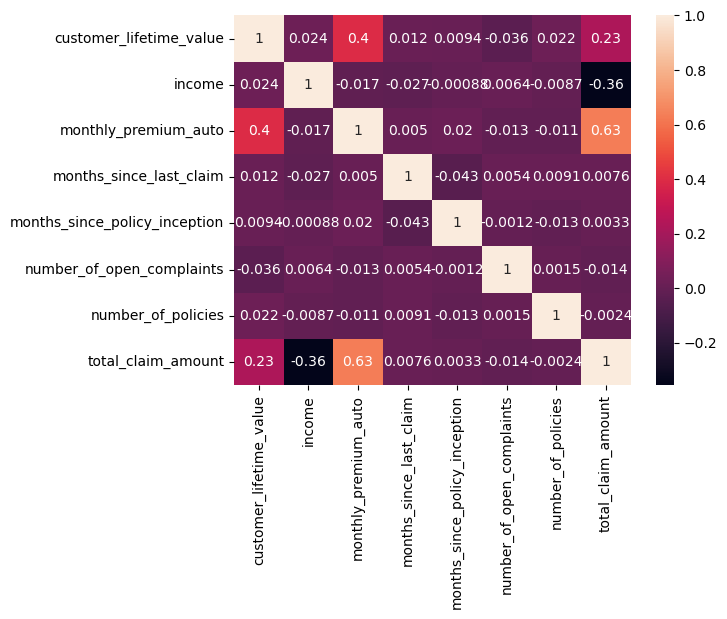

In [5]:
corr_matrix = num_columns.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

As by the correlations heatmap, we see no need to drop any of the features.

In [6]:
y = data['total_claim_amount']
X_num = num_columns.drop(['total_claim_amount'], axis=1)

We checked the outliers of the rest of the numerical variables, but we need to check 'customer_lifetime_value'

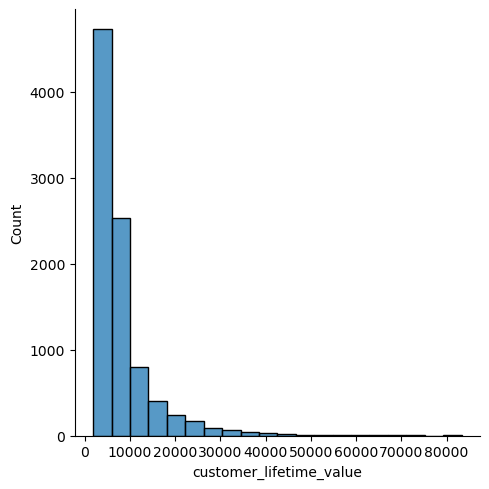

In [7]:
sns.displot(X_num['customer_lifetime_value'], bins=20)

In [8]:
data[data['customer_lifetime_value']>60000].select_dtypes(include=[np.number])

customer_lifetime_value  income  monthly_premium_auto  \
1974              74228.51604       0                   242   
3760              61850.18803       0                   238   
4126              60556.19213       0                   204   
5279              66025.75407   33481                   188   
5716              83325.38119   58958                   231   
6252              73225.95652   39547                   202   
7283              67907.27050   78310                   192   
7303              64618.75715       0                   217   
8825              61134.68307       0                   198   

      months_since_last_claim  months_since_policy_inception  \
1974                        1                             34   
3760                       19                             29   
4126                       35                             45   
5279                       28                             46   
5716                       31                             74   
6252                       11                             21   
7283                       34                             18   
7303                       14                             40   
8825                        2                             75   

      number_of_open_complaints  number_of_policies  total_claim_amount  
1974                          0                   2         1742.400000  
3760                          0                   2         1142.400000  
4126                          0                   2          979.200000  
5279                          0                   2         1194.892002  
5716                          0                   2         1108.800000  
6252                          0                   2          969.600000  
7283                          1                   2          151.711475  
7303                          1                   2         1562.400000  
8825                          0                   2         2275.265075

In [9]:
data[data['customer_lifetime_value']>60000].select_dtypes(include='object')

customer       state response  coverage             education  \
1974  YC54142  Washington       No  Extended  High School or Below   
3760  AZ84403      Oregon       No  Extended               College   
4126  JT47995     Arizona       No  Extended               College   
5279  SK66747  Washington       No     Basic              Bachelor   
5716  FQ61281      Oregon       No  Extended  High School or Below   
6252  BP23267  California       No  Extended              Bachelor   
7283  KH55886      Oregon       No   Premium              Bachelor   
7303  FB95288  California       No  Extended  High School or Below   
8825  US30122  California       No     Basic               College   

     effective_to_date employmentstatus gender location_code marital_status  \
1974           1/26/11       Unemployed      M      Suburban         Single   
3760            2/4/11       Unemployed      F      Suburban        Married   
4126            1/1/11       Unemployed      F      Suburban        Married   
5279           2/22/11         Employed      M      Suburban         Single   
5716           1/31/11         Employed      M      Suburban        Married   
6252            2/9/11         Employed      F      Suburban        Married   
7283            2/5/11         Employed      M         Rural        Married   
7303           1/17/11       Unemployed      M      Suburban        Married   
8825           2/28/11       Unemployed      M      Suburban         Single   

         policy_type        policy renew_offer_type sales_channel  \
1974   Personal Auto   Personal L1           Offer1        Branch   
3760   Personal Auto   Personal L1           Offer3        Branch   
4126   Personal Auto   Personal L3           Offer1           Web   
5279   Personal Auto   Personal L3           Offer1         Agent   
5716   Personal Auto   Personal L3           Offer1   Call Center   
6252   Personal Auto   Personal L3           Offer1        Branch   
7283   Personal Auto   Personal L1           Offer1         Agent   
7303   Personal Auto   Personal L3           Offer1        Branch   
8825  Corporate Auto  Corporate L3           Offer2        Branch   

     vehicle_class vehicle_size  
1974    Luxury Car      Medsize  
3760    Luxury SUV      Medsize  
4126    Luxury SUV        Large  
5279    Luxury SUV      Medsize  
5716    Luxury Car        Small  
6252    Luxury SUV      Medsize  
7283    Sports Car      Medsize  
7303    Luxury Car        Small  
8825    Luxury Car      Medsize

These customers own luxury cars, with a high monthly premium (with respect to the mean) and most of them have an extended or premium coverage. So, the data doesn't seem to be inconsistent at first glance.

We keep them as part of the feature at least for the first iteration of the model.

##### Scaling with MinMax.

In [10]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_num)

In [11]:
x_num_normalized = transformer.transform(X_num)
X_num_norm = pd.DataFrame(x_num_normalized, columns=X_num.columns)

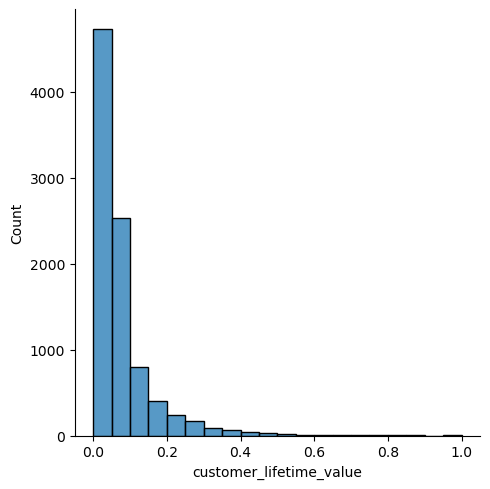

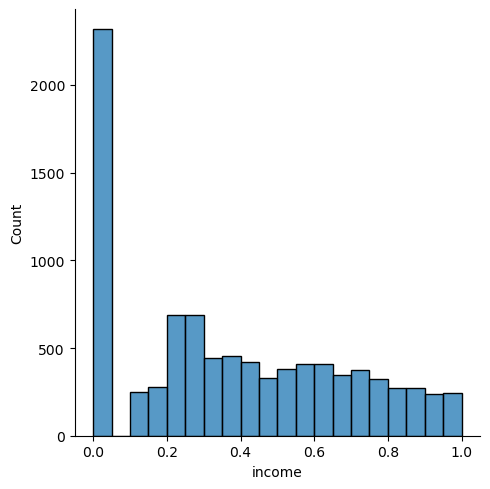

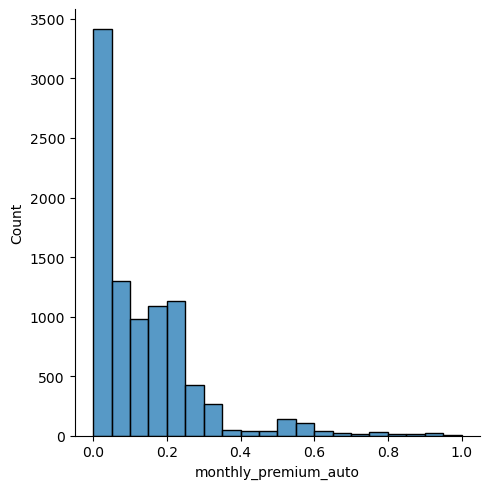

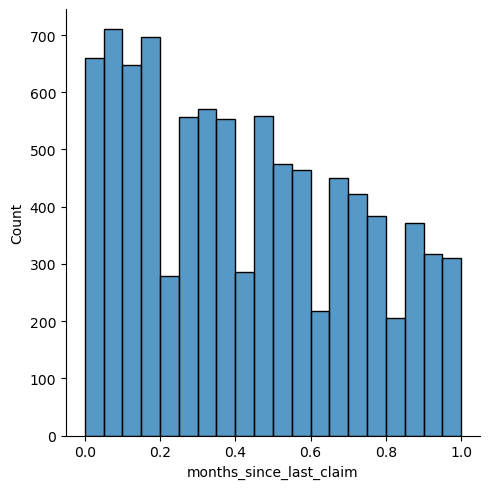

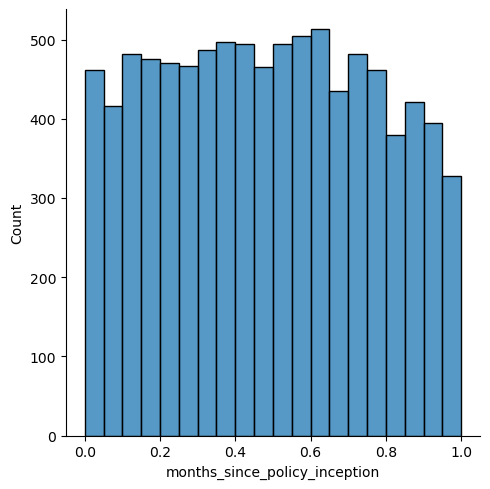

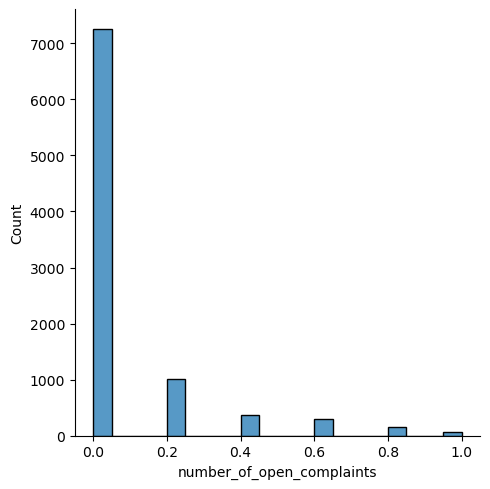

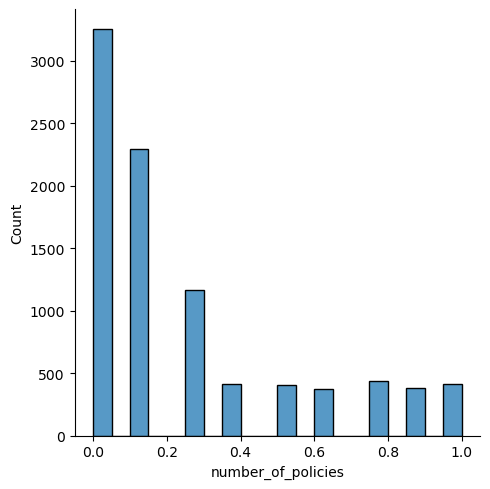

In [12]:
for column in X_num_norm.columns:
    sns.displot(X_num_norm[column], bins=20)
plt.show()

We've checked the plots and now the data is normalized.

In [13]:
cat_columns.value_counts()

customer  state       response  coverage  education             effective_to_date  employmentstatus  gender  location_code  marital_status  policy_type     policy        renew_offer_type  sales_channel  vehicle_class  vehicle_size
AA10041   California  No        Basic     High School or Below  2/2/11             Unemployed        M       Suburban       Single          Personal Auto   Personal L3   Offer1            Call Center    SUV            Medsize         1
RL28880   Nevada      No        Basic     Bachelor              2/12/11            Employed          F       Suburban       Divorced        Personal Auto   Personal L3   Offer1            Branch         Two-Door Car   Medsize         1
RK63095   California  No        Extended  College               1/1/11             Employed          M       Suburban       Single          Personal Auto   Personal L3   Offer2            Web            Two-Door Car   Medsize         1
RK76184   Arizona     No        Basic     College            

In [14]:
cat_columns

customer       state response  coverage education effective_to_date  \
0     BU79786  Washington       No     Basic  Bachelor           2/24/11   
1     QZ44356     Arizona       No  Extended  Bachelor           1/31/11   
2     AI49188      Nevada       No   Premium  Bachelor           2/19/11   
3     WW63253  California       No     Basic  Bachelor           1/20/11   
4     HB64268  Washington       No     Basic  Bachelor            2/3/11   
...       ...         ...      ...       ...       ...               ...   
9129  LA72316  California       No     Basic  Bachelor           2/10/11   
9130  PK87824  California      Yes  Extended   College           2/12/11   
9131  TD14365  California       No  Extended  Bachelor            2/6/11   
9132  UP19263  California       No  Extended   College            2/3/11   
9133  Y167826  California       No  Extended   College           2/14/11   

     employmentstatus gender location_code marital_status     policy_type  \
0            Employed      F      Suburban        Married  Corporate Auto   
1          Unemployed      F      Suburban         Single   Personal Auto   
2            Employed      F      Suburban        Married   Personal Auto   
3          Unemployed      M      Suburban        Married  Corporate Auto   
4            Employed      M         Rural         Single   Personal Auto   
...               ...    ...           ...            ...             ...   
9129         Employed      M         Urban        Married   Personal Auto   
9130         Employed      F      Suburban       Divorced  Corporate Auto   
9131       Unemployed      M      Suburban         Single  Corporate Auto   
9132         Employed      M      Suburban        Married   Personal Auto   
9133       Unemployed      M      Suburban         Single  Corporate Auto   

            policy renew_offer_type sales_channel  vehicle_class vehicle_size  
0     Corporate L3           Offer1         Agent   Two-Door Car      Medsize  
1      Personal L3           Offer3         Agent  Four-Door Car      Medsize  
2      Personal L3           Offer1         Agent   Two-Door Car      Medsize  
3     Corporate L2           Offer1   Call Center            SUV      Medsize  
4      Personal L1           Offer1         Agent  Four-Door Car      Medsize  
...            ...              ...           ...            ...          ...  
9129   Personal L1           Offer2           Web  Four-Door Car      Medsize  
9130  Corporate L3           Offer1        Branch  Four-Door Car      Medsize  
9131  Corporate L2           Offer1        Branch  Four-Door Car      Medsize  
9132   Personal L2           Offer3        Branch  Four-Door Car        Large  
9133  Corporate L3           Offer4   Call Center   Two-Door Car      Medsize  

[9134 rows x 16 columns]

We drop customer column, as it contains the ids of the dataset.

In [15]:
X_cat = cat_columns.drop(['customer'], axis=1)

We do the same with effective_to_date column, as it contains a handful of different values and doesn't seem to add that much information.

In [16]:
X_cat = X_cat.drop(['effective_to_date'], axis=1)

In [17]:
X_cat

state response  coverage education employmentstatus gender  \
0     Washington       No     Basic  Bachelor         Employed      F   
1        Arizona       No  Extended  Bachelor       Unemployed      F   
2         Nevada       No   Premium  Bachelor         Employed      F   
3     California       No     Basic  Bachelor       Unemployed      M   
4     Washington       No     Basic  Bachelor         Employed      M   
...          ...      ...       ...       ...              ...    ...   
9129  California       No     Basic  Bachelor         Employed      M   
9130  California      Yes  Extended   College         Employed      F   
9131  California       No  Extended  Bachelor       Unemployed      M   
9132  California       No  Extended   College         Employed      M   
9133  California       No  Extended   College       Unemployed      M   

     location_code marital_status     policy_type        policy  \
0         Suburban        Married  Corporate Auto  Corporate L3   
1         Suburban         Single   Personal Auto   Personal L3   
2         Suburban        Married   Personal Auto   Personal L3   
3         Suburban        Married  Corporate Auto  Corporate L2   
4            Rural         Single   Personal Auto   Personal L1   
...            ...            ...             ...           ...   
9129         Urban        Married   Personal Auto   Personal L1   
9130      Suburban       Divorced  Corporate Auto  Corporate L3   
9131      Suburban         Single  Corporate Auto  Corporate L2   
9132      Suburban        Married   Personal Auto   Personal L2   
9133      Suburban         Single  Corporate Auto  Corporate L3   

     renew_offer_type sales_channel  vehicle_class vehicle_size  
0              Offer1         Agent   Two-Door Car      Medsize  
1              Offer3         Agent  Four-Door Car      Medsize  
2              Offer1         Agent   Two-Door Car      Medsize  
3              Offer1   Call Center            SUV      Medsize  
4              Offer1         Agent  Four-Door Car      Medsize  
...               ...           ...            ...          ...  
9129           Offer2           Web  Four-Door Car      Medsize  
9130           Offer1        Branch  Four-Door Car      Medsize  
9131           Offer1        Branch  Four-Door Car      Medsize  
9132           Offer3        Branch  Four-Door Car        Large  
9133           Offer4   Call Center   Two-Door Car      Medsize  

[9134 rows x 14 columns]

##### Encoding categorical columns with one hot encoder.

Now we encode the rest of the categorical columns with one hot encoder method.

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
def apply_one_hot_encoding(data, column_name):
    encoder = OneHotEncoder(drop='first').fit(data)
    encoded = encoder.transform(data).toarray()
    column_names = encoder.get_feature_names_out([column_name])
    onehot_encoded = pd.DataFrame(encoded, columns=column_names)
    return onehot_encoded

X_cat_encoded = []
for column_name in X_cat.columns:
    encoded_data = apply_one_hot_encoding(X_cat[[column_name]], column_name)
    X_cat_encoded.append(encoded_data)

In [20]:
X = pd.concat([X_num_norm] + X_cat_encoded, axis=1)
X

customer_lifetime_value    income  monthly_premium_auto  \
0                    0.010629  0.562847              0.033755   
1                    0.062406  0.000000              0.139241   
2                    0.134960  0.487763              0.198312   
3                    0.070589  0.000000              0.189873   
4                    0.011245  0.438443              0.050633   
...                       ...       ...                   ...   
9129                 0.264137  0.719547              0.050633   
9130                 0.014719  0.216081              0.075949   
9131                 0.076951  0.000000              0.101266   
9132                 0.069098  0.219452              0.147679   
9133                 0.008766  0.000000              0.067511   

      months_since_last_claim  months_since_policy_inception  \
0                    0.914286                       0.050505   
1                    0.371429                       0.424242   
2                    0.514286                       0.383838   
3                    0.514286                       0.656566   
4                    0.342857                       0.444444   
...                       ...                            ...   
9129                 0.514286                       0.898990   
9130                 0.400000                       0.282828   
9131                 0.257143                       0.373737   
9132                 0.971429                       0.030303   
9133                 0.085714                       0.909091   

      number_of_open_complaints  number_of_policies  state_California  \
0                           0.0               0.000               0.0   
1                           0.0               0.875               0.0   
2                           0.0               0.125               0.0   
3                           0.0               0.750               1.0   
4                           0.0               0.000               0.0   
...                         ...                 ...               ...   
9129                        0.0               0.125               1.0   
9130                        0.0               0.000               1.0   
9131                        0.6               0.125               1.0   
9132                        0.0               0.250               1.0   
9133                        0.0               0.000               1.0   

      state_Nevada  state_Oregon  ...  sales_channel_Branch  \
0              0.0           0.0  ...                   0.0   
1              0.0           0.0  ...                   0.0   
2              1.0           0.0  ...                   0.0   
3              0.0           0.0  ...                   0.0   
4              0.0           0.0  ...                   0.0   
...            ...           ...  ...                   ...   
9129           0.0           0.0  ...                   0.0   
9130           0.0           0.0  ...                   1.0   
9131           0.0           0.0  ...                   1.0   
9132           0.0           0.0  ...                   1.0   
9133           0.0           0.0  ...                   0.0   

      sales_channel_Call Center  sales_channel_Web  vehicle_class_Luxury Car  \
0                           0.0                0.0                       0.0   
1                           0.0                0.0                       0.0   
2                           0.0                0.0                       0.0   
3                           1.0                0.0                       0.0   
4                           0.0                0.0                       0.0   
...                         ...                ...                       ...   
9129                        0.0                1.0                       0.0   
9130                        0.0                0.0                       0.0   
9131                        0.0                0.0                       0.0   
9132                  

##### Linear regression model (1).

Train-test split.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 50)
(1827, 50)
(7307,)
(1827,)


In [23]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

We make predictions with X_test.

In [24]:
y_pred = lm.predict(X_test)

##### Metrics (betwween y_test and the predictions made with X_test).

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7609131808615344

In [26]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

20748.564853063748

In [27]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

144.04362135500395

In [28]:
y_test.mean()

437.68487787301586

In [29]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

97.05199457588124


##### Checking multicollinearity of categorical features.

We check if there's multicollinearity between categorical encoded features.

In [30]:
X_cat_encoded = pd.concat(X_cat_encoded, axis=1)

corr_mat_X_cat_enc = X_cat_encoded.corr()
corr_mat_X_cat_enc

state_California  state_Nevada  state_Oregon  \
state_California                        1.000000     -0.237200     -0.457797   
state_Nevada                           -0.237200      1.000000     -0.206285   
state_Oregon                           -0.457797     -0.206285      1.000000   
state_Washington                       -0.224482     -0.101153     -0.195225   
response_Yes                            0.003233     -0.002438      0.002447   
coverage_Extended                       0.003206      0.007461     -0.006781   
coverage_Premium                       -0.001744      0.012204      0.001996   
education_College                       0.011844     -0.014557      0.006690   
education_Doctor                       -0.021771     -0.005905      0.012283   
education_High School or Below         -0.013867      0.012138     -0.005170   
education_Master                       -0.001304      0.012826     -0.005338   
employmentstatus_Employed              -0.003824      0.004429     -0.000783   
employmentstatus_Medical Leave          0.002190      0.005736     -0.005733   
employmentstatus_Retired                0.012980     -0.004780     -0.003229   
employmentstatus_Unemployed             0.002619     -0.005737      0.002348   
gender_M                                0.011234     -0.003865     -0.003682   
location_code_Suburban                  0.001922     -0.006177     -0.002833   
location_code_Urban                     0.002083     -0.000746     -0.001597   
marital_status_Married                  0.000888     -0.011706      0.000167   
marital_status_Single                   0.002706      0.009835      0.000271   
policy_type_Personal Auto              -0.022641     -0.002940      0.002803   
policy_type_Special Auto               -0.020074     -0.002793      0.018709   
policy_Corporate L2                     0.018485      0.005325     -0.008289   
policy_Corporate L3                     0.011956      0.004821      0.004057   
policy_Personal L1                     -0.023961      0.000284      0.005593   
policy_Personal L2                      0.036103     -0.013960     -0.032893   
policy_Personal L3                     -0.034971      0.009323      0.027264   
policy_Special L1                      -0.026545     -0.006009      0.003454   
policy_Special L2                      -0.018313      0.006040      0.018816   
policy_Special L3                       0.005400     -0.006727      0.007408   
renew_offer_type_Offer2                 0.000456      0.000364      0.000412   
renew_offer_type_Offer3                 0.011500     -0.008438     -0.003854   
renew_offer_type_Offer4                -0.000834      0.004841     -0.001226   
sales_channel_Branch                    0.007548     -0.000722     -0.006465   
sales_channel_Call Center              -0.002151     -0.006978     -0.003442   
sales_channel_Web                      -0.008468      0.014794      0.013565   
vehicle_class_Luxury Car               -0.002110      0.000729     -0.000762   
vehicle_class_Luxury SUV               -0.000746      0.003252      0.013130   
vehicle_class_SUV                       0.007894     -0.004128      0.007062   
vehicle_class_Sports Car                0.010370      0.013674     -0.004141   
vehicle_class_Two-Door Car             -0.012186      0.009966      0.007756   
vehicle_size_Medsize                    0.009371     -0.025411     -0.006532   
vehicle_size_Small                     -0.010702      0.025038      0.011481   

                                state_Washington  response_Yes  \
state_California                       -0.224482      0.003233   
state_Nevada                           -0.101153     -0.002438   
state_Oregon                           -0.195225      0.002447   
state_Washington                        1.000000     -0.005838   
response_Yes                           -0.005838      1.000000   
coverage_Extended                      -0.003855     -0.001812   
coverage_Premium                        0.000014 

In [31]:
filt_rows = corr_mat_X_cat_enc[corr_mat_X_cat_enc>0.85]
filt_rows

state_California  state_Nevada  state_Oregon  \
state_California                             1.0           NaN           NaN   
state_Nevada                                 NaN           1.0           NaN   
state_Oregon                                 NaN           NaN           1.0   
state_Washington                             NaN           NaN           NaN   
response_Yes                                 NaN           NaN           NaN   
coverage_Extended                            NaN           NaN           NaN   
coverage_Premium                             NaN           NaN           NaN   
education_College                            NaN           NaN           NaN   
education_Doctor                             NaN           NaN           NaN   
education_High School or Below               NaN           NaN           NaN   
education_Master                             NaN           NaN           NaN   
employmentstatus_Employed                    NaN           NaN           NaN   
employmentstatus_Medical Leave               NaN           NaN           NaN   
employmentstatus_Retired                     NaN           NaN           NaN   
employmentstatus_Unemployed                  NaN           NaN           NaN   
gender_M                                     NaN           NaN           NaN   
location_code_Suburban                       NaN           NaN           NaN   
location_code_Urban                          NaN           NaN           NaN   
marital_status_Married                       NaN           NaN           NaN   
marital_status_Single                        NaN           NaN           NaN   
policy_type_Personal Auto                    NaN           NaN           NaN   
policy_type_Special Auto                     NaN           NaN           NaN   
policy_Corporate L2                          NaN           NaN           NaN   
policy_Corporate L3                          NaN           NaN           NaN   
policy_Personal L1                           NaN           NaN           NaN   
policy_Personal L2                           NaN           NaN           NaN   
policy_Personal L3                           NaN           NaN           NaN   
policy_Special L1                            NaN           NaN           NaN   
policy_Special L2                            NaN           NaN           NaN   
policy_Special L3                            NaN           NaN           NaN   
renew_offer_type_Offer2                      NaN           NaN           NaN   
renew_offer_type_Offer3                      NaN           NaN           NaN   
renew_offer_type_Offer4                      NaN           NaN           NaN   
sales_channel_Branch                         NaN           NaN           NaN   
sales_channel_Call Center                    NaN           NaN           NaN   
sales_channel_Web                            NaN           NaN           NaN   
vehicle_class_Luxury Car                     NaN           NaN           NaN   
vehicle_class_Luxury SUV                     NaN           NaN           NaN   
vehicle_class_SUV                            NaN           NaN           NaN   
vehicle_class_Sports Car                     NaN           NaN           NaN   
vehicle_class_Two-Door Car                   NaN           NaN           NaN   
vehicle_size_Medsize                         NaN           NaN           NaN   
vehicle_size_Small                           NaN           NaN           NaN   

                                state_Washington  response_Yes  \
state_California                             NaN           NaN   
state_Nevada                                 NaN           NaN   
state_Oregon                                 NaN           NaN   
state_Washington                             1.0           NaN   
response_Yes                                 NaN           1.0   
coverage_Extended                            NaN           NaN   
coverage_Premium                             NaN 

In [32]:
filt_rows.value_counts

<bound method DataFrame.value_counts of                                 state_California  state_Nevada  state_Oregon  \
state_California                             1.0           NaN           NaN   
state_Nevada                                 NaN           1.0           NaN   
state_Oregon                                 NaN           NaN           1.0   
state_Washington                             NaN           NaN           NaN   
response_Yes                                 NaN           NaN           NaN   
coverage_Extended                            NaN           NaN           NaN   
coverage_Premium                             NaN           NaN           NaN   
education_College                            NaN           NaN           NaN   
education_Doctor                             NaN           NaN           NaN   
education_High School or Below               NaN           NaN           NaN   
education_Master                             NaN           NaN           NaN   


We check visually the text with all the columns and we don't spot any correlation larger than 0.85. A priori, we should keep these features.

##### Trying to improve the model changing to StandardScaler.

As we have decided to keep the extreme values in some of the numerical features, maybe using **standardscaler** could help.

StandardScaler transforms the variables so that they show a distribution more centered around zero and a standard deviation of one. This could help in reducing the impact of these extreme values, making this impact more proportional to the other values.

In [33]:
X_num

customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  
0                             0                   1  
1                             0                   8  
2                             0                   2  
3                             0                   7  
4                             0                   1  
...                         ...                 ...  
9129                          0                   2  
9130                          0                   1  
9131                          3                   2  
9132                          0                   3  
9133                          0                   1  

[9134 rows x 7 columns]

In [34]:
from sklearn.preprocessing import StandardScaler
transformer_s = StandardScaler().fit(X_num)

In [35]:
x_normalized_s = transformer_s.transform(X_num)
X_num_norm_s = pd.DataFrame(x_normalized_s, columns=X_num.columns)

In [36]:
X_num_norm_s.describe()

customer_lifetime_value        income  monthly_premium_auto  \
count             9.134000e+03  9.134000e+03          9.134000e+03   
mean              4.006235e-17  7.467933e-17         -1.487752e-16   
std               1.000055e+00  1.000055e+00          1.000055e+00   
min              -8.888511e-01 -1.239617e+00         -9.364417e-01   
25%              -5.837472e-01 -1.239617e+00         -7.329893e-01   
50%              -3.238088e-01 -1.240322e-01         -2.970199e-01   
75%               1.393223e-01  8.118515e-01          4.586604e-01   
max               1.096273e+01  2.051587e+00          5.951875e+00   

       months_since_last_claim  months_since_policy_inception  \
count             9.134000e+03                   9.134000e+03   
mean              4.472981e-17                   1.003504e-16   
std               1.000055e+00                   1.000055e+00   
min              -1.498803e+00                  -1.722470e+00   
25%              -9.031338e-01                  -8.623923e-01   
50%              -1.089082e-01                  -2.314821e-03   
75%               7.845956e-01                   8.219261e-01   
max               1.975934e+00                   1.825350e+00   

       number_of_open_complaints  number_of_policies  
count               9.134000e+03        9.134000e+03  
mean                7.623515e-17       -1.361342e-17  
std                 1.000055e+00        1.000055e+00  
min                -4.222496e-01       -8.226479e-01  
25%                -4.222496e-01       -8.226479e-01  
50%                -4.222496e-01       -4.042468e-01  
75%                -4.222496e-01        4.325555e-01  
max                 5.070242e+00        2.524561e+00

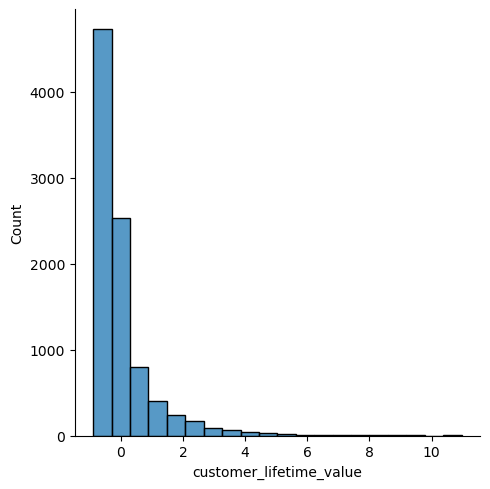

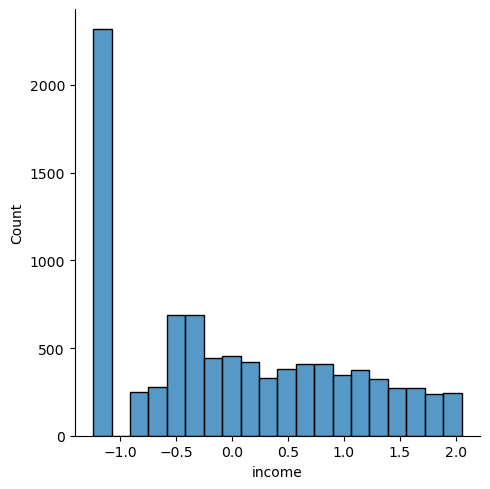

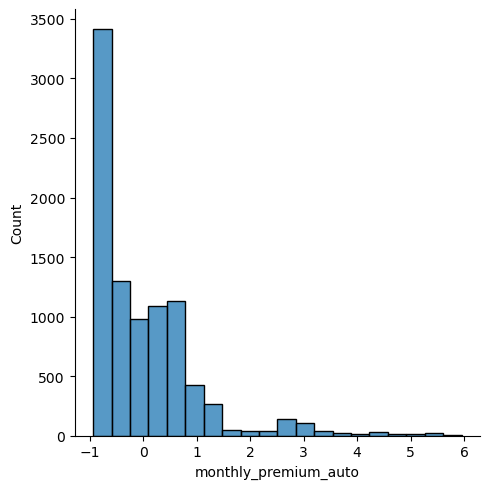

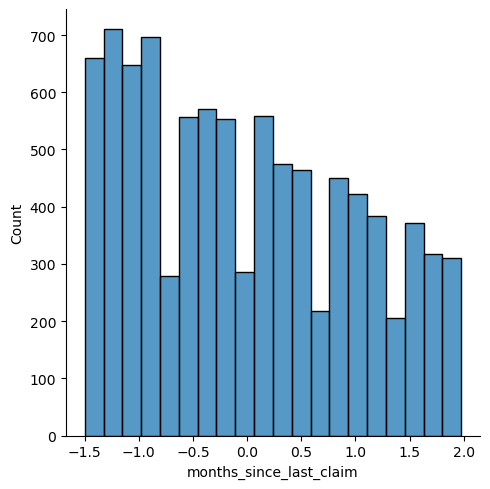

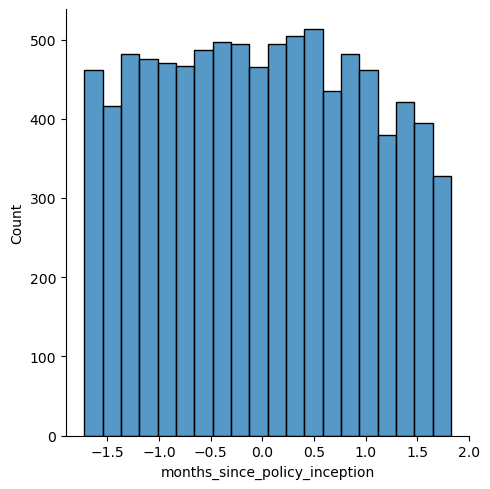

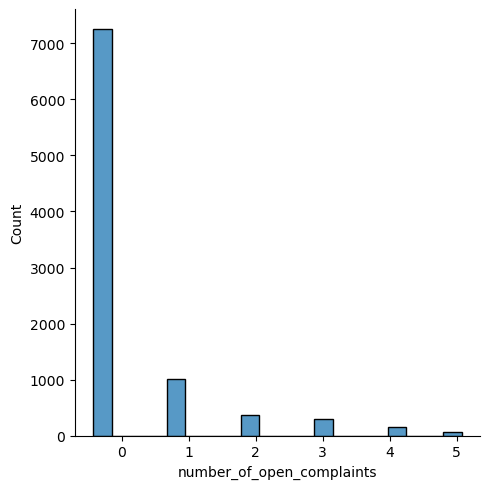

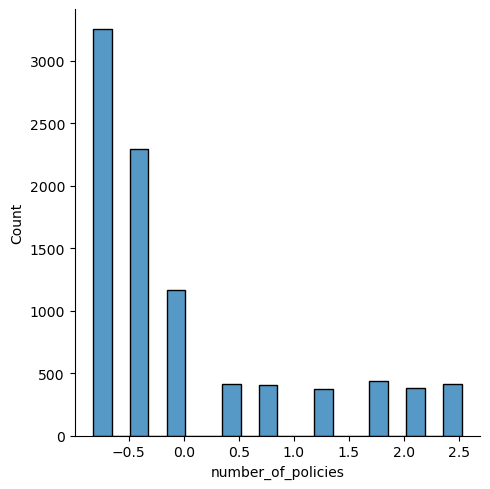

In [37]:
for column in X_num_norm_s.columns:
    sns.displot(X_num_norm_s[column], bins=20)
plt.show()

We check the plots and see the X numerical now are normalized with StandardScaler.

In [38]:
X_2 = pd.concat([X_num_norm_s] + [X_cat_encoded], axis=1)
X_2

customer_lifetime_value    income  monthly_premium_auto  \
0                   -0.762878  0.612827             -0.703925   
1                   -0.149245 -1.239617              0.022691   
2                    0.710636  0.365710              0.429596   
3                   -0.052263 -1.239617              0.371467   
4                   -0.755575  0.203390             -0.587666   
...                       ...       ...                   ...   
9129                 2.241590  1.128558             -0.587666   
9130                -0.714411 -0.528450             -0.413278   
9131                 0.023135 -1.239617             -0.238891   
9132                -0.069935 -0.517356              0.080820   
9133                -0.784955 -1.239617             -0.471408   

      months_since_last_claim  months_since_policy_inception  \
0                    1.678099                      -1.543287   
1                   -0.208186                      -0.217334   
2                    0.288205                      -0.360680   
3                    0.288205                       0.606907   
4                   -0.307465                      -0.145661   
...                       ...                            ...   
9129                 0.288205                       1.466984   
9130                -0.108908                      -0.719046   
9131                -0.605299                      -0.396517   
9132                 1.876656                      -1.614960   
9133                -1.200968                       1.502821   

      number_of_open_complaints  number_of_policies  state_California  \
0                     -0.422250           -0.822648               0.0   
1                     -0.422250            2.106160               0.0   
2                     -0.422250           -0.404247               0.0   
3                     -0.422250            1.687759               1.0   
4                     -0.422250           -0.822648               0.0   
...                         ...                 ...               ...   
9129                  -0.422250           -0.404247               1.0   
9130                  -0.422250           -0.822648               1.0   
9131                   2.873245           -0.404247               1.0   
9132                  -0.422250            0.014154               1.0   
9133                  -0.422250           -0.822648               1.0   

      state_Nevada  state_Oregon  ...  sales_channel_Branch  \
0              0.0           0.0  ...                   0.0   
1              0.0           0.0  ...                   0.0   
2              1.0           0.0  ...                   0.0   
3              0.0           0.0  ...                   0.0   
4              0.0           0.0  ...                   0.0   
...            ...           ...  ...                   ...   
9129           0.0           0.0  ...                   0.0   
9130           0.0           0.0  ...                   1.0   
9131           0.0           0.0  ...                   1.0   
9132           0.0           0.0  ...                   1.0   
9133           0.0           0.0  ...                   0.0   

      sales_channel_Call Center  sales_channel_Web  vehicle_class_Luxury Car  \
0                           0.0                0.0                       0.0   
1                           0.0                0.0                       0.0   
2                           0.0                0.0                       0.0   
3                           1.0                0.0                       0.0   
4                           0.0                0.0                       0.0   
...                         ...                ...                       ...   
9129                        0.0                1.0                       0.0   
9130                        0.0                0.0                       0.0   
9131                        0.0                0.0                       0.0   
9132                  

##### Linear regression model (2).

Train-test split.

In [39]:
from sklearn.model_selection import train_test_split
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y, test_size=0.2)

We check.

In [40]:
print(X_2_train.shape)
print(X_2_test.shape)
print(y_2_train.shape)
print(y_2_test.shape)

(7307, 50)
(1827, 50)
(7307,)
(1827,)


In [41]:
from sklearn import linear_model

lm_2 = linear_model.LinearRegression()
lm_2.fit(X_2_train,y_2_train)

LinearRegression()

We make predictions with X_2_test.

In [42]:
y_2_pred = lm_2.predict(X_2_test)

Metrics (betwween y_2_test and the predictions made with X_2_test).

In [43]:

from sklearn.metrics import r2_score
r2_score(y_2_test, y_2_pred)

0.7741017569824012

In [44]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_2_test,y_2_pred)
mse

18688.402620255

In [45]:
rmse = np.sqrt(mean_squared_error(y_2_test,y_2_pred))
rmse

136.7055325151656

In [46]:
y_2_test.mean()

431.14140008483855

In [47]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_2_test, y_2_pred)
print(mae)

96.15044868355281


Applying StandardScaler for this case doesn't improve the metrics.

In [48]:
X_num

customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  
0                             0                   1  
1                             0                   8  
2                             0                   2  
3                             0                   7  
4                             0                   1  
...                         ...                 ...  
9129                          0                   2  
9130                          0                   1  
9131                          3                   2  
9132                          0                   3  
9133                          0                   1  

[9134 rows x 7 columns]

In [49]:
X_num.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64

In [50]:
zero_values_num_columns = (X_num == 0).sum()
zero_values_num_columns

customer_lifetime_value             0
income                           2317
monthly_premium_auto                0
months_since_last_claim           314
months_since_policy_inception      83
number_of_open_complaints        7252
number_of_policies                  0
dtype: int64

In [51]:
data[data['income']==0]

customer       state  customer_lifetime_value response  coverage  \
1     QZ44356     Arizona              6979.535903       No  Extended   
3     WW63253  California              7645.861827       No     Basic   
7     CF85061     Arizona              7216.100311       No   Premium   
10    SX51350  California              4738.992022       No     Basic   
11    VQ65197  California              8197.197078       No     Basic   
...       ...         ...                      ...      ...       ...   
9123  WZ45103  California              5678.050167      Yes  Extended   
9125  RX91025  California             19872.262000       No   Premium   
9126  AC13887  California              4628.995325       No     Basic   
9131  TD14365  California              8163.890428       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

                 education effective_to_date employmentstatus gender  income  \
1                 Bachelor           1/31/11       Unemployed      F       0   
3                 Bachelor           1/20/11       Unemployed      M       0   
7                   Master           1/18/11       Unemployed      M       0   
10                 College           2/21/11       Unemployed      M       0   
11                 College            1/6/11       Unemployed      F       0   
...                    ...               ...              ...    ...     ...   
9123              Bachelor           1/19/11       Unemployed      F       0   
9125  High School or Below           1/31/11       Unemployed      M       0   
9126              Bachelor            1/9/11       Unemployed      M       0   
9131              Bachelor            2/6/11       Unemployed      M       0   
9133               College           2/14/11       Unemployed      M       0   

      ... months_since_policy_inception number_of_open_complaints  \
1     ...                            42                         0   
3     ...                            65                         0   
7     ...                            68                         0   
10    ...                             5                         0   
11    ...                            87                         0   
...   ...                           ...                       ...   
9123  ...                            44                         0   
9125  ...                            35                         0   
9126  ...                            21                         0   
9131  ...                            37                         3   
9133  ...                            90                         0   

      number_of_policies     policy_type        policy  renew_offer_type  \
1                      8   Personal Auto   Personal L3            Offer3   
3                      7  Corporate Auto  Corporate L2            Offer1   
7                      4  Corporate Auto  Corporate L3            Offer1   
10                     3   Personal Auto   Personal L3            Offer1   
11                     3   Personal Auto   Personal L3            Offer2   
...                  ...             ...           ...               ...   
9123                   3   Personal Auto   Personal L2            Offer2   
9125                   2   Personal Auto   Personal L3            Offer1   
9126                   4  Corporate Auto  Corporate L1            Offer1   
9131                   2  Corporate Auto  Corporate L2            Offer1   
9133                   1  Corporate Auto  Corporate L3            Offer4   

      sales_channel total_claim_amount  vehicle_class vehicle_size  
1             Agent        1131.464935  Four-Door Car      Medsize  
3       Call Center         529.881344            SUV      Medsize  
7             Agent         363.029680  Four-Door Car      Medsize  
10            Agent         482.400000  Four-Door Car        Small  
11            Agent         528.000000            SUV      Medsize  
...        

In [52]:
data[data['income']==0]['employmentstatus'].unique()

array(['Unemployed'], dtype=object)

##### Applying lof transformation to some of the features.

We apply log transformation to the numerical features that are skewed: customer lifetime value and monthly premium auto.

In [53]:
def log_transf(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

X_num_log = X_num
X_num_log['customer_lifetime_value'] = X_num_log['customer_lifetime_value'].apply(log_transf)
X_num_log['monthly_premium_auto'] = X_num_log['monthly_premium_auto'].apply(log_transf)

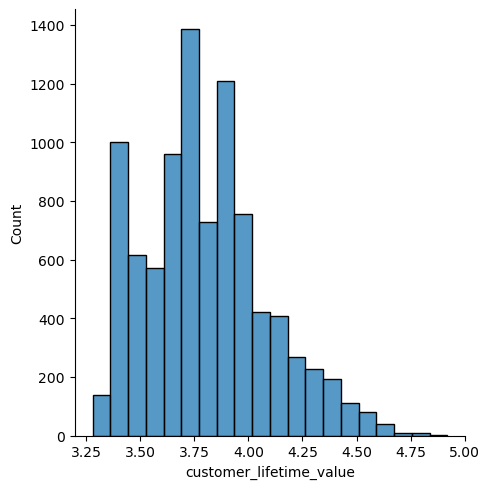

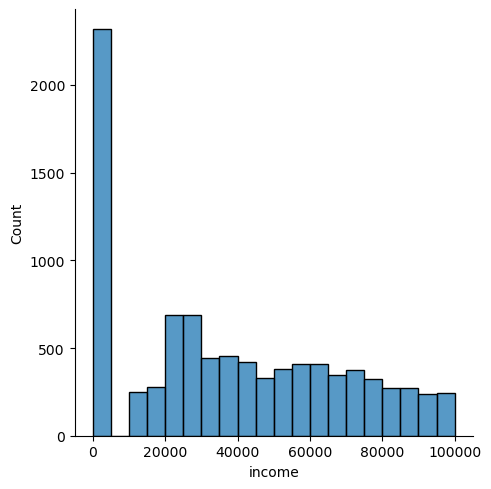

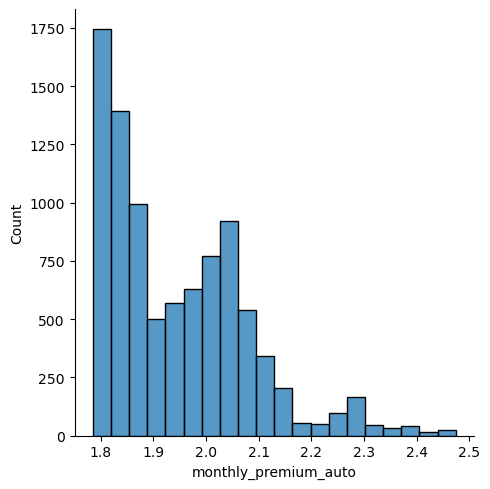

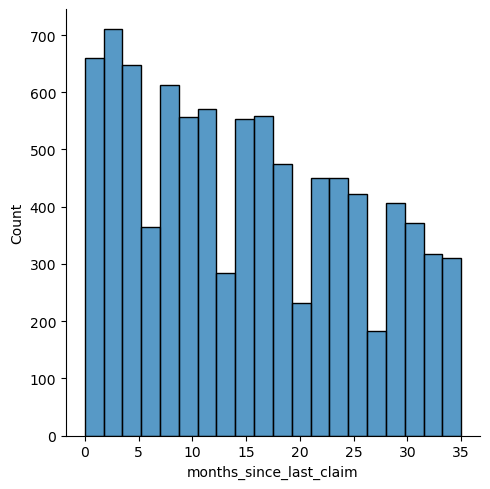

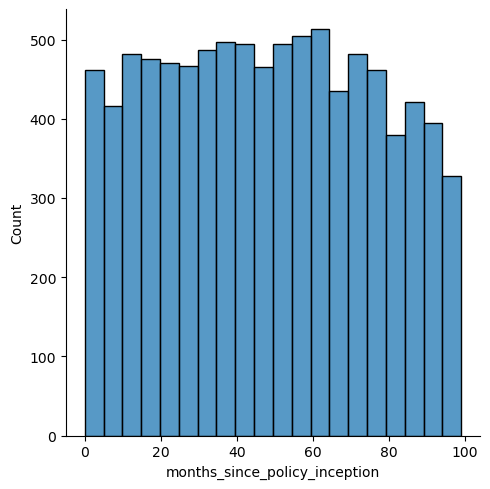

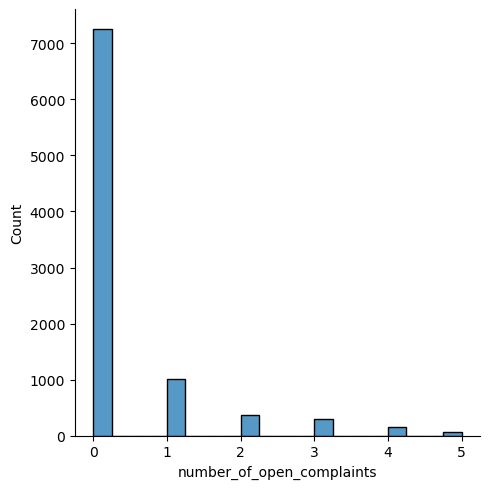

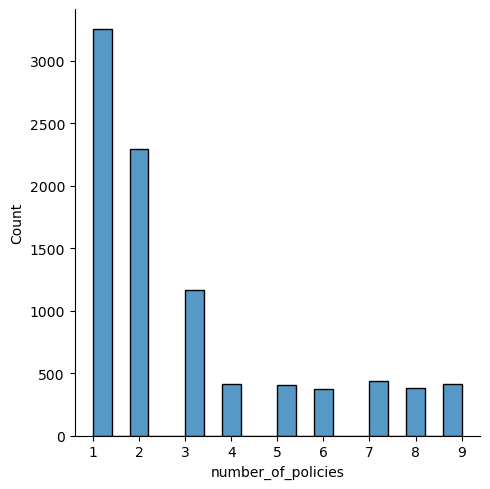

In [54]:
for column in X_num_log.columns:
    sns.displot(X_num_log[column], bins=20)
plt.show()

We scale our X numerical (that now includes two features with log transformation).

In [55]:
from sklearn.preprocessing import MinMaxScaler
transformer_log = MinMaxScaler().fit(X_num_log)

In [56]:
x_num_log_norm = transformer_log.transform(X_num_log)
X_num_log_norm = pd.DataFrame(x_num_log_norm, columns=X_num_log.columns)

In [57]:
X_3 = pd.concat([X_num_log_norm] + [X_cat_encoded], axis=1)

Train-test split.

In [58]:
from sklearn.model_selection import train_test_split
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y, test_size=0.2)

We check.

In [59]:
print(X_3_train.shape)
print(X_3_test.shape)
print(y_3_train.shape)
print(y_3_test.shape)

(7307, 50)
(1827, 50)
(7307,)
(1827,)


##### Linear regression model (3).

In [60]:
from sklearn import linear_model

lm_3 = linear_model.LinearRegression()
lm_3.fit(X_3_train,y_3_train)

LinearRegression()

We make predictions with X_3_test.

In [61]:
y_3_pred = lm_3.predict(X_3_test)

Metrics (betwween y_3_test and the predictions made with X_3_test).

In [62]:

from sklearn.metrics import r2_score
r2_score(y_3_test, y_3_pred)

0.7649039299213387

In [63]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_3_test,y_3_pred)
mse

19445.47762935823

In [64]:
rmse = np.sqrt(mean_squared_error(y_3_test,y_3_pred))
rmse

139.44704238297143

In [65]:
y_3_test.mean()

436.7462397651889

In [66]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_3_test, y_3_pred)
print(mae)

96.76315505768481


##### Linear regression model (4). Changing test size.

We can try changing the variable of train-test split for our first model (the one that got the best metrics).

As we've got more than 9 thousand columns, maybe we can give more train data to the model and still have some reasonable number of test inputs.

In [67]:
X.shape

(9134, 50)

In [68]:
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X, y, test_size=0.14)

In [69]:
from sklearn import linear_model

lm_4 = linear_model.LinearRegression()
lm_4.fit(X_4_train,y_4_train)

LinearRegression()

We make predictions with X_4_test.

In [70]:
y_4_pred = lm_4.predict(X_4_test)

Metrics (betwween y_3_test and the predictions made with X_3_test).

In [71]:

from sklearn.metrics import r2_score
r2_score(y_4_test, y_4_pred)

0.7867759024381253

In [72]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_4_test,y_4_pred)
mse

17606.849848408856

In [73]:
rmse = np.sqrt(mean_squared_error(y_4_test,y_4_pred))
rmse

132.69080544035015

In [74]:
y_4_test.mean()

438.7719381360438

In [75]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_4_test, y_4_pred)
print(mae)

94.3668860981456


##### Filtering dataset: removing unemployed customers.

In [76]:
data_empl = data[data['employmentstatus'] != 'Unemployed']

In [77]:
data_empl.shape

(6817, 24)

In [78]:
num_columns_empl = data_empl.select_dtypes(include=[np.number])
cat_columns_empl = data_empl.select_dtypes(include='object')

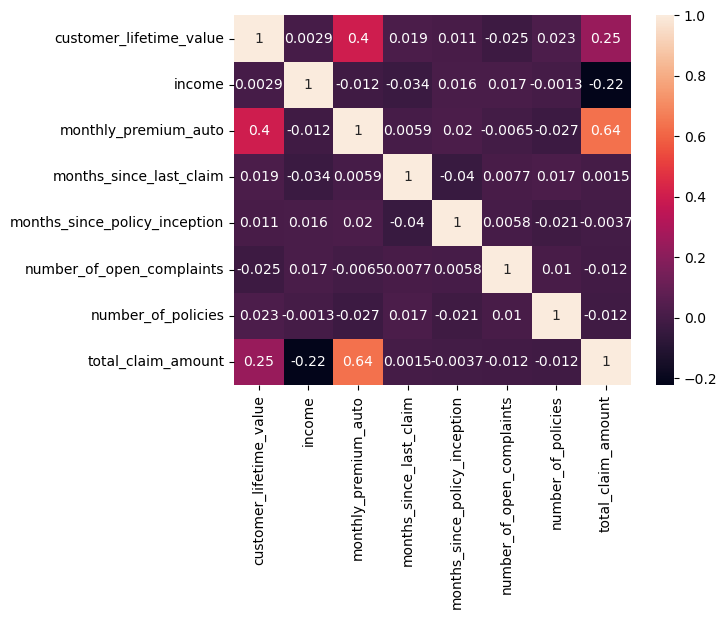

In [79]:
corr_matrix_empl = num_columns_empl.corr()
sns.heatmap(corr_matrix_empl, annot=True)
plt.show()

We drop customer column, as it contains the ids of the dataset.

In [80]:
X_cat_empl = cat_columns_empl.drop(['customer'], axis=1)

We do the same with effective_to_date column, as it contains a handful of different values and doesn't seem to add that much information.

In [81]:
X_cat_empl = X_cat_empl.drop(['effective_to_date'], axis=1)

##### Linear regression model. Model for data of customers with status different than unemployed.

X-y split.

In [82]:
y_empl = num_columns_empl['total_claim_amount']
X_num_empl = num_columns_empl.drop(['total_claim_amount'], axis=1)

Scaling with minmaxscaler.

In [83]:
transformer_empl = MinMaxScaler().fit(X_num_empl)

In [84]:
x_num_empl_norm = transformer.transform(X_num_empl)
X_num_empl_norm = pd.DataFrame(x_num_empl_norm, columns=X_num_empl.columns)

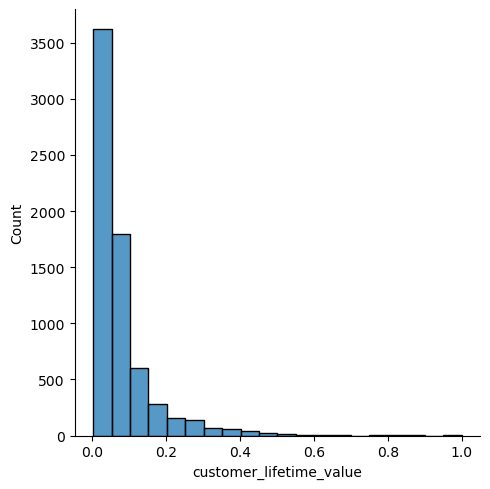

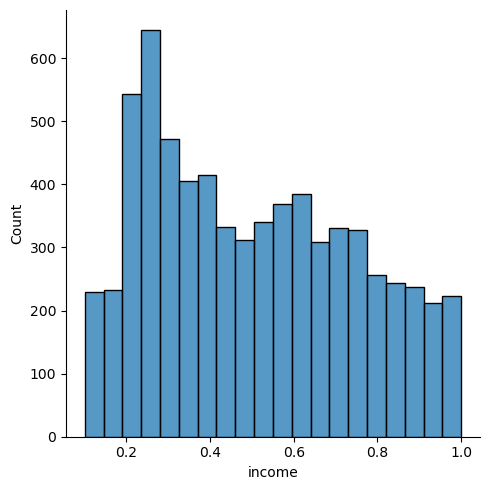

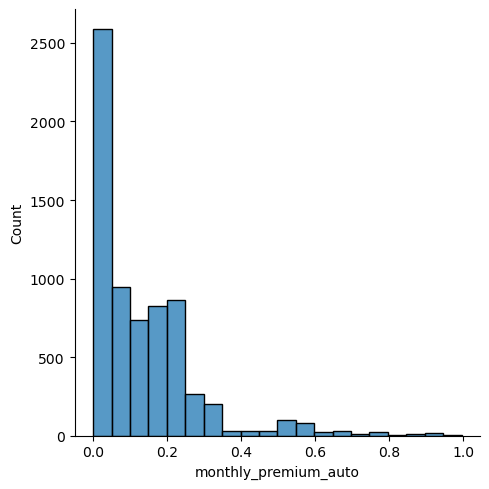

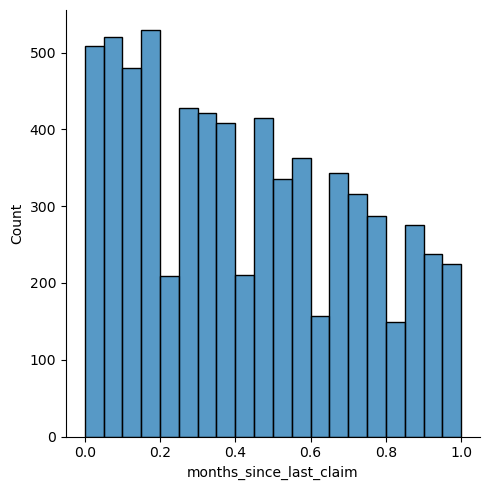

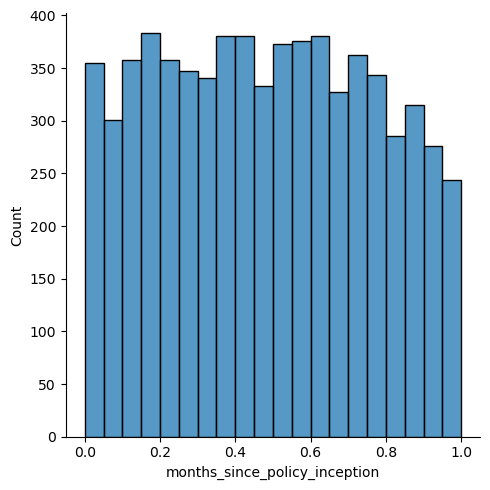

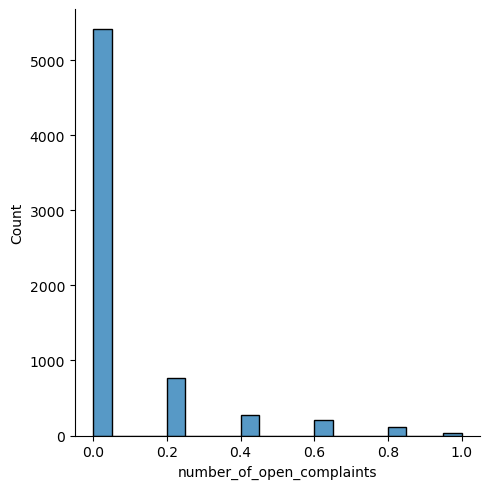

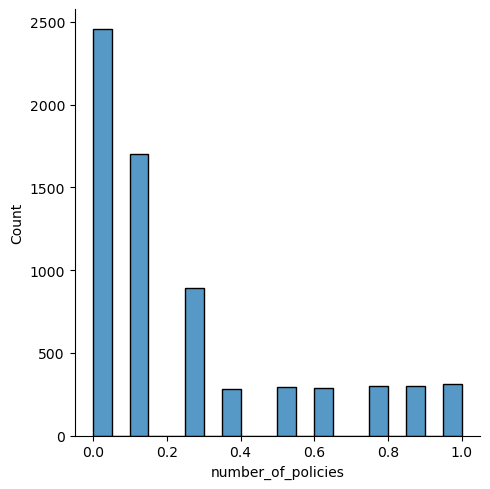

In [85]:
for column in X_num_empl_norm.columns:
    sns.displot(X_num_empl_norm[column], bins=20)
plt.show()

Encoding with one hot encoder.

In [86]:
X_cat_empl_encoded = []
for column_name in X_cat_empl.columns:
    encoded_data = apply_one_hot_encoding(X_cat_empl[[column_name]], column_name)
    X_cat_empl_encoded.append(encoded_data)

In [87]:
X_empl = pd.concat([X_num_empl_norm] + X_cat_empl_encoded, axis=1)
X_empl

customer_lifetime_value    income  monthly_premium_auto  \
0                    0.010629  0.562847              0.033755   
1                    0.134960  0.487763              0.198312   
2                    0.011245  0.438443              0.050633   
3                    0.078085  0.629140              0.033755   
4                    0.042773  0.553605              0.025316   
...                       ...       ...                   ...   
6812                 0.038490  0.663796              0.012658   
6813                 0.027047  0.477701              0.181435   
6814                 0.264137  0.719547              0.050633   
6815                 0.014719  0.216081              0.075949   
6816                 0.069098  0.219452              0.147679   

      months_since_last_claim  months_since_policy_inception  \
0                    0.914286                       0.050505   
1                    0.514286                       0.383838   
2                    0.342857                       0.444444   
3                    0.400000                       0.949495   
4                    0.000000                       0.131313   
...                       ...                            ...   
6812                 0.171429                       0.484848   
6813                 0.457143                       0.585859   
6814                 0.514286                       0.898990   
6815                 0.400000                       0.282828   
6816                 0.971429                       0.030303   

      number_of_open_complaints  number_of_policies  state_California  \
0                           0.0               0.000               0.0   
1                           0.0               0.125               0.0   
2                           0.0               0.000               0.0   
3                           0.0               0.125               0.0   
4                           0.0               1.000               0.0   
...                         ...                 ...               ...   
6812                        0.0               0.250               1.0   
6813                        0.0               0.000               1.0   
6814                        0.0               0.125               1.0   
6815                        0.0               0.000               1.0   
6816                        0.0               0.250               1.0   

      state_Nevada  state_Oregon  ...  sales_channel_Branch  \
0              0.0           0.0  ...                   0.0   
1              1.0           0.0  ...                   0.0   
2              0.0           0.0  ...                   0.0   
3              0.0           1.0  ...                   0.0   
4              0.0           1.0  ...                   0.0   
...            ...           ...  ...                   ...   
6812           0.0           0.0  ...                   0.0   
6813           0.0           0.0  ...                   1.0   
6814           0.0           0.0  ...                   0.0   
6815           0.0           0.0  ...                   1.0   
6816           0.0           0.0  ...                   1.0   

      sales_channel_Call Center  sales_channel_Web  vehicle_class_Luxury Car  \
0                           0.0                0.0                       0.0   
1                           0.0                0.0                       0.0   
2                           0.0                0.0                       0.0   
3                           0.0                1.0                       0.0   
4                           0.0                0.0                       0.0   
...                         ...                ...                       ...   
6812                        1.0                0.0                       0.0   
6813                        0.0                0.0                       0.0   
6814                        0.0                1.0                       0.0   
6815                  

Train-test split.

In [88]:
from sklearn.model_selection import train_test_split
X_empl_train, X_empl_test, y_empl_train, y_empl_test = train_test_split(X_empl, y_empl, test_size=0.2)

In [89]:
print(X_empl_train.shape)
print(X_empl_test.shape)
print(y_empl_train.shape)
print(y_empl_test.shape)

(5453, 49)
(1364, 49)
(5453,)
(1364,)


In [90]:
from sklearn import linear_model

lm_empl = linear_model.LinearRegression()
lm_empl.fit(X_empl_train,y_empl_train)

LinearRegression()

We make predictions with X_test.

In [91]:
y_empl_pred = lm_empl.predict(X_empl_test)

##### Metrics (betwween y_empl_test and the predictions made with X_empl_test).

In [92]:
from sklearn.metrics import r2_score
r2_score(y_empl_test, y_empl_pred)

0.803915188553023

In [93]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_empl_test,y_empl_pred)
mse

12097.920940193417

In [94]:
rmse = np.sqrt(mean_squared_error(y_empl_test,y_empl_pred))
rmse

109.99054932217321

In [95]:
y_empl_test.mean()

379.29610612170086

In [96]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_empl_test, y_empl_pred)
print(mae)

76.78572284648615
